# Cek instalasi di terminal, buka Python (python), ketik:
import pandas
import numpy
import matplotlib
import jupyter
print("Library siap dipake!")

In [1]:
import pandas
import numpy
import matplotlib
import jupyter
print("Library siap dipake!")

Library siap dipake!


# Query Soal 1: Conditional Statements (If-Else) dan Aritmatika

## Deskripsi Soal 1 :

1. Menggabungkan Environmental_Dataset.xlsx dan Financial_Dataset.xlsx berdasarkan kolom Project_ID.
2. Memfilter hanya proyek PLTS (Project_ID yang diawali dengan "PLTS").
3. Menghitung rasio efisiensi pengurangan CO2:
> CO2_Reduction/(Investment_Cost × 1.000.000)
> CO2_Reduction/(Investment_Cost×1.000.000)
4. Klasifikasikan efisiensi:
> High: jika rasio ≥ 0.5
> Low: jika rasio < 0.5

## Langkah 1: Import dan Baca Dataset Environmental dan Financial
_Penjelasan:_
 Gunakan pandas untuk membaca file Excel dan menyimpannya dalam DataFrame._

In [70]:
import pandas as pd

# Membaca file Excel dataset environmental
df_env = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Environmental_Dataset.xlsx')
# melihat preview dataset environmental
df_env.head()


,Project_ID,CO2_Reduction,Energy_Output,Environmental_Risk_Index,Konteks_Lingkungan,Peringkat_Dampak
0,PLTS-NTT-001,75000,25000,45,"Sumba: radiasi matahari tinggi, rawan kekeringan",High: 🌿🌿🌿🌿
1,PLTM-SUMUT-001,30000,10000,60,"Tapanuli: banjir musiman, debit air stabil",Medium: 🌿🌿🌿
2,PLTS-JATIM-001,90000,30000,30,"Surabaya: risiko rendah, efisiensi tinggi",High: 🌿🌿🌿🌿🌿
3,PLTM-KALB-001,35000,12000,55,"Kalbar: rawan banjir, hutan lindung dekat",Medium: 🌿🌿🌿
4,PLTS-SULS-001,60000,20000,40,"Makassar: cuaca stabil, risiko sedang",High: 🌿🌿🌿🌿


In [69]:
# Membaca file Excel dataset financial
df_fin = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Financial_Dataset.xlsx')

# melihat preview dataset financial
df_fin.head()

,Project_ID,Investment_Cost,Revenue_Stream,Debt_Ratio,Payment_Delay,Konteks_Proyek,Status_Rank
0,PLTS-NTT-001,150.00,12.5,0.65,30,"PLTS di Sumba, biaya logistik tinggi, pendanaa...",Medium: ★★★☆☆
1,PLTM-SUMUT-001,80.00,6.8,0.55,15,"PLTM di Tapanuli, akses mudah ke jaringan PLN",Low: ★★☆☆☆
2,PLTS-JATIM-001,200.23,18.0,0.70,45,"PLTS besar di Surabaya, permintaan pasar tinggi",High: ★★★★☆
3,PLTM-KALB-001,90.00,7.2,0.60,20,"PLTM di Kalimantan Barat, tantangan lahan adat",Medium: ★★★☆☆
4,PLTS-SULS-001,125.50,10.0,0.50,10,"PLTS di Makassar, efisiensi tinggi distribusi",Low: ★☆☆☆☆


## Langkah 2: Gabungkan Kedua Dataset Berdasarkan 'Project_ID'
_Penjelasan:_
Menggabungkan kedua dataset agar informasi `CO2_Reduction` dan `Investment_Cost` berada dalam satu DataFrame.

In [68]:
#merger dataset environmental dengan dataset financial
df_merged = df_env.merge(df_fin, on="Project_ID")

# melihat preview gabungan dataset environmental dengan dataset financial
df_merged.head()


,Project_ID,CO2_Reduction,Energy_Output,Environmental_Risk_Index,Konteks_Lingkungan,Peringkat_Dampak,Investment_Cost,Revenue_Stream,Debt_Ratio,Payment_Delay,Konteks_Proyek,Status_Rank
0,PLTS-NTT-001,75000,25000,45,"Sumba: radiasi matahari tinggi, rawan kekeringan",High: 🌿🌿🌿🌿,150.00,12.5,0.65,30,"PLTS di Sumba, biaya logistik tinggi, pendanaa...",Medium: ★★★☆☆
1,PLTM-SUMUT-001,30000,10000,60,"Tapanuli: banjir musiman, debit air stabil",Medium: 🌿🌿🌿,80.00,6.8,0.55,15,"PLTM di Tapanuli, akses mudah ke jaringan PLN",Low: ★★☆☆☆
2,PLTS-JATIM-001,90000,30000,30,"Surabaya: risiko rendah, efisiensi tinggi",High: 🌿🌿🌿🌿🌿,200.23,18.0,0.70,45,"PLTS besar di Surabaya, permintaan pasar tinggi",High: ★★★★☆
3,PLTM-KALB-001,35000,12000,55,"Kalbar: rawan banjir, hutan lindung dekat",Medium: 🌿🌿🌿,90.00,7.2,0.60,20,"PLTM di Kalimantan Barat, tantangan lahan adat",Medium: ★★★☆☆
4,PLTS-SULS-001,60000,20000,40,"Makassar: cuaca stabil, risiko sedang",High: 🌿🌿🌿🌿,125.50,10.0,0.50,10,"PLTS di Makassar, efisiensi tinggi distribusi",Low: ★☆☆☆☆


## Langkah 3: Filter Proyek yang Dimulai dengan "PLTS"
_Penjelasan:_
Memilih baris yang hanya memiliki Project_ID yang diawali "PLTS" menggunakan metode `.str.startswith()`.

In [39]:
#Memilih baris yang hanya memiliki Project_ID yang diawali "PLTS"
plts_df = df_merged[df_merged["Project_ID"].str.startswith("PLTS")]


## Langkah 4: Hitung Rasio dan Klasifikasikan dengan if-else
_Penjelasan:_

. Loop melalui setiap baris dalam DataFrame
. Hitung efisiensi CO2 per Rp1 juta
. Gunakan if-else untuk klasifikasi
. Cetak hasil dalam format yang diminta

In [ ]:
#melakukan looping dari data gabungan
for _, row in plts_df.iterrows():
    # menghitung ratio CO2 Reduction dengan biaya investasi 
    ratio = row["CO2_Reduction"] / (row["Investment_Cost"] * 1_000)
    # mengkategorikan ratio diatas 0.5 sebagai High, dibawah 0.5 sebagai Low
    category = "High" if ratio >= 0.5 else "Low"
    # cetak Project_ID: nilai_efisiensi (kategori)
    print(f"{row['Project_ID']}: {ratio:.2f} ({category})")


PLTS-NTT-001: 0.50 (High)
PLTS-JATIM-001: 0.45 (Low)
PLTS-SULS-001: 0.48 (Low)
PLTS-NTB-001: 0.44 (Low)
PLTS-JABW-001: 0.43 (Low)


# Kesimpulan Soal 1
. Menggabungkan data
. Memfilter berdasarkan string
. Melakukan perhitungan numerik
. Menggunakan logika kondisional `if-else`
. Menampilkan hasil menggunakan `f-string`
---


# Soal 2: For Loop dan List

## Deskripsi Soal 2 :

1. Gunakan data dari Environmental_Dataset.xlsx
2. Ambil semua nilai CO2_Reduction untuk proyek dengan Project_ID yang diawali "PLTM"
3. Simpan nilai-nilai tersebut ke dalam list
4. Hitung total dan rata-rata pengurangan CO2


## Langkah 1: Import dan Baca Dataset Environmental

_Penjelasan:_
File Environmental_Dataset.xlsx memuat data Project_ID dan CO2_Reduction.


In [67]:
import pandas as pd

# Membaca file Excel dataset environmental
df_env = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Environmental_Dataset.xlsx')
# melihat preview dataset environmental
df_env.head()

,Project_ID,CO2_Reduction,Energy_Output,Environmental_Risk_Index,Konteks_Lingkungan,Peringkat_Dampak
0,PLTS-NTT-001,75000,25000,45,"Sumba: radiasi matahari tinggi, rawan kekeringan",High: 🌿🌿🌿🌿
1,PLTM-SUMUT-001,30000,10000,60,"Tapanuli: banjir musiman, debit air stabil",Medium: 🌿🌿🌿
2,PLTS-JATIM-001,90000,30000,30,"Surabaya: risiko rendah, efisiensi tinggi",High: 🌿🌿🌿🌿🌿
3,PLTM-KALB-001,35000,12000,55,"Kalbar: rawan banjir, hutan lindung dekat",Medium: 🌿🌿🌿
4,PLTS-SULS-001,60000,20000,40,"Makassar: cuaca stabil, risiko sedang",High: 🌿🌿🌿🌿


## Langkah 2: Buat List dari Proyek PLTM
_Penjelasan:_

. Iterasi dilakukan pada setiap baris data.
. Jika Project_ID dimulai dengan "PLTM", maka nilai CO2_Reduction dimasukkan ke dalam co2_list.

In [64]:
co2_list = []

for _, row in df_env.iterrows():
    if row["Project_ID"].startswith("PLTM"):
        co2_list.append(row["CO2_Reduction"])

print(f"Nilai Co2 reduction yang ditemukan untuk PLTM : {co2_list}")


Nilai Co2 reduction yang ditemukan untuk PLTM : [30000, 35000, 40000, 32000, 36000]


## Langkah 3: Hitung Rata-Rata dan Cetak Hasil
_Penjelasan:_

. Cek apakah list tidak kosong agar menghindari pembagian dengan nol.
. Hitung rata-rata dan cetak hasil dengan pembulatan ke angka bulat (:.0f).

In [65]:
if co2_list:
    avg = sum(co2_list) / len(co2_list)
    print(f"Average CO2 Reduction for PLTM Projects: {avg:.0f} tons CO2e")
else:
    print("No PLTM projects found.")


Average CO2 Reduction for PLTM Projects: 34600 tons CO2e


## Kesimpulan Soal 2

. Struktur for loop
. Penggunaan list untuk menyimpan nilai
. Menyaring data berdasarkan pola string
. Penghitungan statistik sederhana (rata-rata)
---


# Soal 3: While Loop dan Input Pengguna
## Deskripsi Soal 3:

1. Gunakan data dari `Social_Dataset.xlsx`

2. Buat program yang:

    . Meminta input Project_ID dari pengguna berulang kali
    . Jika Project_ID valid → tampilkan Land_Status dan Tingkat_Konflik
    . Jika tidak valid → tampilkan "Project not found"
    . Jika input Project_ID adalah "DONE" → keluar dari loop


## Langkah 1: Import dan Baca Dataset Sosial
_Penjelasan:_
 Dataset ini memuat Project_ID, Land_Status, dan Tingkat_Konflik.

In [11]:
import pandas as pd

# Membaca file Excel dataset sosial
df_social = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Social_Dataset.xlsx')
# melihat preview dataset sosial
df_social.head()


,Project_ID,Land_Status,Community_Support,Population_Density,Konteks_Sosial,Tingkat_Konflik
0,PLTS-NTT-001,Adat,70,50,"Sumba: lahan adat, konsultasi intensif",High: ⚠️⚠️⚠️
1,PLTM-SUMUT-001,Negara,85,200,"Tapanuli: izin BPN lancar, dukungan tinggi",Low: ⚠️
2,PLTS-JATIM-001,Swasta,90,800,"Surabaya: lahan swasta, masyarakat urban",Low: ⚠️
3,PLTM-KALB-001,Adat,65,100,"Kalbar: lahan adat, risiko konflik sedang",High: ⚠️⚠️⚠️
4,PLTS-SULS-001,Negara,80,300,"Makassar: izin mudah, dukungan baik",Medium: ⚠️⚠️


## Langkah 2: Ubah Data ke Dictionary untuk Akses Cepat
_Penjelasan:_
 Data diubah jadi dictionary agar bisa langsung dicari berdasarkan Project_ID.

In [12]:
# Ubah menjadi dictionary: Project_ID → {Land_Status, Tingkat_Konflik}
social_dict = df_social.set_index("Project_ID")[["Land_Status", "Tingkat_Konflik"]].to_dict("index")

print(f'{social_dict}')

{'PLTS-NTT-001': {'Land_Status': 'Adat', 'Tingkat_Konflik': 'High: ⚠️⚠️⚠️'}, 'PLTM-SUMUT-001': {'Land_Status': 'Negara', 'Tingkat_Konflik': 'Low: ⚠️'}, 'PLTS-JATIM-001': {'Land_Status': 'Swasta', 'Tingkat_Konflik': 'Low: ⚠️'}, 'PLTM-KALB-001': {'Land_Status': 'Adat', 'Tingkat_Konflik': 'High: ⚠️⚠️⚠️'}, 'PLTS-SULS-001': {'Land_Status': 'Negara', 'Tingkat_Konflik': 'Medium: ⚠️⚠️'}, 'PLTM-PAPU-001': {'Land_Status': 'Adat', 'Tingkat_Konflik': 'High: ⚠️⚠️⚠️⚠️'}, 'PLTS-NTB-001': {'Land_Status': 'Swasta', 'Tingkat_Konflik': 'Low: ⚠️'}, 'PLTM-ACHD-001': {'Land_Status': 'Negara', 'Tingkat_Konflik': 'Medium: ⚠️⚠️'}, 'PLTS-JABW-001': {'Land_Status': 'Swasta', 'Tingkat_Konflik': 'Low: ⚠️'}, 'PLTM-SULU-001': {'Land_Status': 'Adat', 'Tingkat_Konflik': 'High: ⚠️⚠️⚠️'}}


##  Langkah 3: Loop Input dan Tampilkan Output
_Penjelasan:_

. Gunakan while True agar loop terus berjalan sampai "DONE" diketik.
. Gunakan in untuk memeriksa apakah Project_ID valid dalam dictionary.
. Tampilkan hasil dengan format f-string.lasan:
. Gunakan while True agar loop terus berjalan sampai "DONE" diketik.
. Gunakan in untuk memeriksa apakah Project_ID valid dalam dictionary.
. Tampilkan hasil dengan format f-string.

In [2]:
def query_project_info():
    while True:
        project_id = input("Masukkan Project_ID (atau ketik 'DONE' untuk keluar): ").strip()
        if project_id.upper() == "DONE":
            print("Program selesai.")
            break
        result = social_df[social_df["Project_ID"] == project_id]
        if not result.empty:
            land_status = result["Land_Status"].values[0]
            konflik = result["Tingkat_Konflik"].values[0]
            print(f"Land_Status: {land_status}, Tingkat_Konflik: {konflik}")
        else:
            print("Project_ID tidak ditemukan.")
            
# Panggil fungsi (aktifkan di sel interaktif)
# query_project_info()


## Kesimpulan Soal 3

. Pemahaman while loop untuk input berulang
. Penggunaan dictionary untuk akses cepat
. Penanganan input yang valid dan tidak valid
. Kontrol alur program dengan break
---


# Soal 4: Dictionary dan Filter Kondisional
 
## Deskripsi Soal 4:

1. Gunakan dua dataset:

    . `Economic_Dataset.xlsx` → mengandung `Daya_Tarik_Investasi`
    . `Social_Dataset.xlsx` → mengandung `Tingkat_Konflik`

2. Gabungkan kedua dataset berdasarkan `Project_ID`

3. Buat dictionary dengan struktur:
`Project_ID` → (`Daya_Tarik_Investasi`, `Tingkat_Konflik`)

4. Tampilkan hanya proyek-proyek yang:

    . `Daya_Tarik_Investasi` == **"High"**

    . `Tingkat_Konflik` == **"Low"**

## Langkah 1: Import dan Baca Dataset Ekonomi dan Sosial
_Penjelasan:_
 Membaca dataset ekonomi dan sosial yang masing-masing berisi informasi investasi dan sosial proyek.

In [15]:
import pandas as pd

# Membaca file Excel dataset Economic
df_econ = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Economic_Dataset.xlsx')
# melihat preview dataset Economic
df_econ.head()

,Project_ID,GDP_Growth,Interest_Rate,Bond_Yield,Konteks_Ekonomi,Daya_Tarik_Investasi
0,PLTS-NTT-001,4.5,4.2,5.1,"Sumba: pertumbuhan rendah, pariwisata hijau",Medium: 💵💵💵
1,PLTM-SUMUT-001,5.2,3.8,4.8,"Tapanuli: ekonomi agro, stabil",High: 💵💵💵💵
2,PLTS-JATIM-001,6.0,0.0,5.0,"Surabaya: pasar besar, industri kuat",High: 💵💵💵💵💵
3,PLTM-KALB-001,4.8,4.1,5.2,"Kalbar: ekonomi perkebunan, sedang tumbuh",Medium: 💵💵💵
4,PLTS-SULS-001,5.5,0.0,4.9,"Makassar: hub ekonomi, pendidikan tinggi",High: 💵💵💵💵


In [16]:
import pandas as pd

# Membaca file Excel dataset sosial
df_social = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Social_Dataset.xlsx')
# melihat preview dataset sosial
df_social.head()

,Project_ID,Land_Status,Community_Support,Population_Density,Konteks_Sosial,Tingkat_Konflik
0,PLTS-NTT-001,Adat,70,50,"Sumba: lahan adat, konsultasi intensif",High: ⚠️⚠️⚠️
1,PLTM-SUMUT-001,Negara,85,200,"Tapanuli: izin BPN lancar, dukungan tinggi",Low: ⚠️
2,PLTS-JATIM-001,Swasta,90,800,"Surabaya: lahan swasta, masyarakat urban",Low: ⚠️
3,PLTM-KALB-001,Adat,65,100,"Kalbar: lahan adat, risiko konflik sedang",High: ⚠️⚠️⚠️
4,PLTS-SULS-001,Negara,80,300,"Makassar: izin mudah, dukungan baik",Medium: ⚠️⚠️


## Langkah 2: Gabungkan Data Berdasarkan Project_ID
_Penjelasan:_
 Setelah penggabungan, setiap baris akan memiliki data gabungan: `Project_ID`, `Daya_Tarik_Investasi`, dan `Tingkat_Konflik`.

In [ ]:
#merger dataset economic dengan dataset social
df_merged_econ_soc = df_econ.merge(df_social, on="Project_ID")

# melihat preview gabungan dataset economic dengan dataset social
df_merged_econ_soc.head()


,Project_ID,GDP_Growth,Interest_Rate,Bond_Yield,Konteks_Ekonomi,Daya_Tarik_Investasi,Land_Status,Community_Support,Population_Density,Konteks_Sosial,Tingkat_Konflik
0,PLTS-NTT-001,4.5,4.2,5.1,"Sumba: pertumbuhan rendah, pariwisata hijau",Medium: 💵💵💵,Adat,70,50,"Sumba: lahan adat, konsultasi intensif",High: ⚠️⚠️⚠️
1,PLTM-SUMUT-001,5.2,3.8,4.8,"Tapanuli: ekonomi agro, stabil",High: 💵💵💵💵,Negara,85,200,"Tapanuli: izin BPN lancar, dukungan tinggi",Low: ⚠️
2,PLTS-JATIM-001,6.0,0.0,5.0,"Surabaya: pasar besar, industri kuat",High: 💵💵💵💵💵,Swasta,90,800,"Surabaya: lahan swasta, masyarakat urban",Low: ⚠️
3,PLTM-KALB-001,4.8,4.1,5.2,"Kalbar: ekonomi perkebunan, sedang tumbuh",Medium: 💵💵💵,Adat,65,100,"Kalbar: lahan adat, risiko konflik sedang",High: ⚠️⚠️⚠️
4,PLTS-SULS-001,5.5,0.0,4.9,"Makassar: hub ekonomi, pendidikan tinggi",High: 💵💵💵💵,Negara,80,300,"Makassar: izin mudah, dukungan baik",Medium: ⚠️⚠️


## Langkah 3: Buat Dictionary dari Data Gabungan
_Penjelasan:_
 Membuat dictionary project_dict agar setiap `Project_ID` punya tuple (`Daya_Tarik_Investasi`, `Tingkat_Konflik`) sebagai nilainya.

In [18]:
project_dict = {
    row["Project_ID"]: (row["Daya_Tarik_Investasi"], row["Tingkat_Konflik"])
    for _, row in df_merged_econ_soc.iterrows()
}

print(f'{project_dict}')
#print(df_merged_econ_soc.head())
#print(df_merged_econ_soc.columns)


{'PLTS-NTT-001': ('Medium: 💵💵💵', 'High: ⚠️⚠️⚠️'), 'PLTM-SUMUT-001': ('High: 💵💵💵💵', 'Low: ⚠️'), 'PLTS-JATIM-001': ('High: 💵💵💵💵💵', 'Low: ⚠️'), 'PLTM-KALB-001': ('Medium: 💵💵💵', 'High: ⚠️⚠️⚠️'), 'PLTS-SULS-001': ('High: 💵💵💵💵', 'Medium: ⚠️⚠️'), 'PLTM-PAPU-001': ('Low: 💵💵', 'High: ⚠️⚠️⚠️⚠️'), 'PLTS-NTB-001': ('High: 💵💵💵💵', 'Low: ⚠️'), 'PLTM-ACHD-001': ('Medium: 💵💵💵', 'Medium: ⚠️⚠️'), 'PLTS-JABW-001': ('High: 💵💵💵💵💵', 'Low: ⚠️'), 'PLTM-SULU-001': ('Medium: 💵💵💵', 'High: ⚠️⚠️⚠️')}


## Langkah 4: Filter dan Tampilkan Proyek yang Sesuai Kriteria
_Penjelasan:_
Looping dictionary dan cetak Project_ID jika memenuhi dua syarat:

``invest == "High: 💵💵💵💵💵"``

``conflict == "Low: ⚠️"``

In [19]:
#untuk mengecek isi Cell Kolom Daya_Tarik_Investasi dan Tingkat_Konflik

#print(df_merged_econ_soc["Daya_Tarik_Investasi"].unique())
#print(df_merged_econ_soc["Tingkat_Konflik"].unique())

print("Projects with High Investment Attractiveness and Low Conflict:")
for pid, (invest, conflict) in project_dict.items():
    if invest == "High: 💵💵💵💵💵" and conflict == "Low: ⚠️":
        print(pid)


Projects with High Investment Attractiveness and Low Conflict:
PLTS-JATIM-001
PLTS-JABW-001


## Kesimpulan

. Penggabungan data dari dua sumber
. Pembuatan dictionary dari DataFrame
. Penggunaan filter logika ganda (`and`)
. Output terstruktur berdasarkan kondisi
---


# Soal 5: Fungsi dan Aritmatika

## Deskripsi Soal 5 :

1. Gunakan data dari Geospatial_Dataset.xlsx dan Financial_Dataset.xlsx
2. Gabungkan kedua dataset berdasarkan Project_ID
3. Buat fungsi calculate_total_investment() yang:
4. Menerima list Project_ID
5. Menjumlahkan nilai Investment_Cost dari proyek dengan Efisiensi_Lokasi == "High"

## Langkah 1: Import dan Baca Dataset Geospatial dan Financial
_Penjelasan:_
 Dataset geo berisi kolom `Efisiensi_Lokasi`, sedangkan fin berisi `Investment_Cost`.

In [7]:
import pandas as pd

# Membaca file Excel dataset Geospatial
df_geo = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Geospatial_Dataset.xlsx')
# melihat preview dataset Geopatial
df_geo.head()

,Project_ID,Solar_Irradiance,Water_Flow,Distance_to_Grid,Konteks_Geospasial,Efisiensi_Lokasi
0,PLTS-NTT-001,5.8,0.0,8,"Sumba: radiasi tinggi, dekat jaringan",High: 📍📍📍📍
1,PLTM-SUMUT-001,0.0,1.5,5,"Tapanuli: debit stabil, akses PLN baik",High: 📍📍📍📍
2,PLTS-JATIM-001,5.5,0.0,3,"Surabaya: radiasi baik, jaringan dekat",High: 📍📍📍📍📍
3,PLTM-KALB-001,0.0,1.8,10,"Kalbar: debit tinggi, jaringan sedang",Medium: 📍📍📍
4,PLTS-SULS-001,5.7,0.0,6,"Makassar: radiasi tinggi, akses baik",High: 📍📍📍📍


In [8]:
import pandas as pd

# Membaca file Excel dataset Financial
df_fin = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Financial_Dataset.xlsx')
# melihat preview dataset Finantial
df_fin.head()

,Project_ID,Investment_Cost,Revenue_Stream,Debt_Ratio,Payment_Delay,Konteks_Proyek,Status_Rank
0,PLTS-NTT-001,150.00,12.5,0.65,30,"PLTS di Sumba, biaya logistik tinggi, pendanaa...",Medium: ★★★☆☆
1,PLTM-SUMUT-001,80.00,6.8,0.55,15,"PLTM di Tapanuli, akses mudah ke jaringan PLN",Low: ★★☆☆☆
2,PLTS-JATIM-001,200.23,18.0,0.70,45,"PLTS besar di Surabaya, permintaan pasar tinggi",High: ★★★★☆
3,PLTM-KALB-001,90.00,7.2,0.60,20,"PLTM di Kalimantan Barat, tantangan lahan adat",Medium: ★★★☆☆
4,PLTS-SULS-001,125.50,10.0,0.50,10,"PLTS di Makassar, efisiensi tinggi distribusi",Low: ★☆☆☆☆


## Langkah 2: Gabungkan Kedua Dataset Geopatial dan Finantial
_Penjelasan:_
 Tujuannya agar semua informasi berada dalam satu tabel.

In [10]:
#merger dataset geopatial dengan dataset financial
df_merged_geo_fin = df_geo.merge(df_fin, on="Project_ID")

# melihat preview gabungan dataset geopatial dengan dataset financial
df_merged_geo_fin.head()


,Project_ID,Solar_Irradiance,Water_Flow,Distance_to_Grid,Konteks_Geospasial,Efisiensi_Lokasi,Investment_Cost,Revenue_Stream,Debt_Ratio,Payment_Delay,Konteks_Proyek,Status_Rank
0,PLTS-NTT-001,5.8,0.0,8,"Sumba: radiasi tinggi, dekat jaringan",High: 📍📍📍📍,150.00,12.5,0.65,30,"PLTS di Sumba, biaya logistik tinggi, pendanaa...",Medium: ★★★☆☆
1,PLTM-SUMUT-001,0.0,1.5,5,"Tapanuli: debit stabil, akses PLN baik",High: 📍📍📍📍,80.00,6.8,0.55,15,"PLTM di Tapanuli, akses mudah ke jaringan PLN",Low: ★★☆☆☆
2,PLTS-JATIM-001,5.5,0.0,3,"Surabaya: radiasi baik, jaringan dekat",High: 📍📍📍📍📍,200.23,18.0,0.70,45,"PLTS besar di Surabaya, permintaan pasar tinggi",High: ★★★★☆
3,PLTM-KALB-001,0.0,1.8,10,"Kalbar: debit tinggi, jaringan sedang",Medium: 📍📍📍,90.00,7.2,0.60,20,"PLTM di Kalimantan Barat, tantangan lahan adat",Medium: ★★★☆☆
4,PLTS-SULS-001,5.7,0.0,6,"Makassar: radiasi tinggi, akses baik",High: 📍📍📍📍,125.50,10.0,0.50,10,"PLTS di Makassar, efisiensi tinggi distribusi",Low: ★☆☆☆☆


## Langkah 3: Buat Fungsi untuk Menghitung Total Investasi
_Penjelasan:_

. Fungsi ini akan menjumlahkan semua `Investment_Cost` jika proyek memiliki efisiensi lokasi tinggi.
. Menggunakan `for loop` dan `if` untuk pengecekan.

In [16]:
def calculate_total_investment(df_merged_geo_fin):
    total_invest = 0
    df_merged_geo_fin["Efisiensi_Lokasi"] = df_merged_geo_fin["Efisiensi_Lokasi"].astype(str).str.strip()
    for _, row in df_merged_geo_fin.iterrows():
        if "High" in row["Efisiensi_Lokasi"]:
            total_invest += row["Investment_Cost"]
    return total_invest


## Langkah 4: Panggil Fungsi dan Tampilkan Hasil
_Penjelasan:_
 Format :.2f digunakan untuk menampilkan hasil dengan 2 angka di belakang koma.

In [17]:
    # total_invest = calculate_total_investment(df_merged_geo_fin)
    # print(f"Total Investment for High-Efficiency Locations: {total_invest:.2f} billion Rp")
total_invest = calculate_total_investment(df_merged_geo_fin)
print(f"Total Investment for High-Efficiency Locations: {total_invest:.2f} billion Rp")


Total Investment for High-Efficiency Locations: 955.73 billion Rp


## Kesimpulan

. Kemampuan membuat fungsi dengan parameter
. Penggabungan data dari dua sumber
. Filter data berdasarkan kategori (`Efisiensi_Lokasi`)
. Perhitungan total numerik
. Format output dengan f-string
---


# Soal 6: Modules dan Error Handling

## Deskripsi Soal 6:

1. Buat modul Python bernama green_analysis.py
2. Isi modul: fungsi compute_co2_efficiency(co2, cost)

3. Mengembalikan rasio:

    * `CO2_Reduction/(Investment_Cost × 1.000.000)`
    * Jika Investment_Cost == 0, kembalikan "Cannot compute"

4. Di script utama (main script):

    * Import modul
    * Uji fungsi pada 3 proyek berbeda

## Langkah 1: Buat Modul green_analysis.py

Buat file baru bernama `green_analysis.py`

_Penjelasan:_
1. Fungsi menerima dua parameter
2. Gunakan try-except untuk menangani pembagian dengan nol
3. Jika terjadi ZeroDivisionError, fungsi tidak crash, tapi mengembalikan pesan teks

## Langkah 2: Script Utama untuk Menguji Fungsi
_Penjelasan:_
1. Import fungsi dari file modul
2. Data proyek ditulis dalam list of tuples
3. Cetak hasil per proyek dengan f-string

In [115]:
# main.py (atau di Jupyter Notebook)

from green_analysis import compute_co2_efficiency

# Contoh data 3 proyek
projects = [
    ("PLTS-NTT-001", 50000000, 100),
    ("PLTS-JATIM-001", 45000000, 200),
    ("PLTM-PAPU-001", 40000000, 0)  # tes error handling
]

# Tampilkan hasil
for pid, co2, cost in projects:
    result = compute_co2_efficiency(co2, cost)
    print(f"{pid}: {result}")


PLTS-NTT-001: 0.5
PLTS-JATIM-001: 0.225
PLTM-PAPU-001: Cannot compute


## Kesimpulan Soal 6

. Pembuatan dan penggunaan modul Python eksternal
. Penerapan fungsi dengan parameter
. Error handling yang aman menggunakan `try-except`
. Format hasil output menggunakan f-string
---


# Soal 7: Error Handling dalam Loop

## Deskripsi Soal 7:
1. Buat daftar `Project_ID` yang ingin dianalisis
2. Ambil data `Energy_Output` dari `Environmental_Dataset.xlsx`
3. Gunakan `for loop` dengan `try-except` untuk menangani `KeyError` jika `Project_ID` tidak ditemukan
4. Hitung dan tampilkan:
    . Total `Energy_Output`
    . Jumlah proyek valid
    . Rata-rata output energi

## Langkah 1: Import dan Baca Dataset
_Penjelasan:_
 File ini berisi data Project_ID dan Energy_Output untuk masing-masing proyek.

In [117]:
import pandas as pd

# Membaca file Excel dataset Environmental
df_env = pd.read_excel('C:/Users/13034506/Documents/GitHub/ETL-Assesment-Green-Finance-Analisys-Data/Environmental_Dataset.xlsx')
# melihat preview dataset Environmental
df_env.head()

,Project_ID,CO2_Reduction,Energy_Output,Environmental_Risk_Index,Konteks_Lingkungan,Peringkat_Dampak
0,PLTS-NTT-001,75000,25000,45,"Sumba: radiasi matahari tinggi, rawan kekeringan",High: 🌿🌿🌿🌿
1,PLTM-SUMUT-001,30000,10000,60,"Tapanuli: banjir musiman, debit air stabil",Medium: 🌿🌿🌿
2,PLTS-JATIM-001,90000,30000,30,"Surabaya: risiko rendah, efisiensi tinggi",High: 🌿🌿🌿🌿🌿
3,PLTM-KALB-001,35000,12000,55,"Kalbar: rawan banjir, hutan lindung dekat",Medium: 🌿🌿🌿
4,PLTS-SULS-001,60000,20000,40,"Makassar: cuaca stabil, risiko sedang",High: 🌿🌿🌿🌿


## Langkah 2: Buat Dictionary dari Dataset
_Penjelasan:_
 Menggunakan `.to_dict()` agar pencarian berdasarkan `Project_ID` menjadi cepat dan efisien.

In [121]:
# Mengubah DataFrame menjadi dictionary
energy_dict = df_env.set_index("Project_ID")["Energy_Output"].to_dict()

print(f'{energy_dict}')

{'PLTS-NTT-001': 25000, 'PLTM-SUMUT-001': 10000, 'PLTS-JATIM-001': 30000, 'PLTM-KALB-001': 12000, 'PLTS-SULS-001': 20000, 'PLTM-PAPU-001': 15000, 'PLTS-NTB-001': 28000, 'PLTM-ACHD-001': 11000, 'PLTS-JABW-001': 32000, 'PLTM-SULU-001': 13000}


## Langkah 3: Buat Daftar Proyek yang Akan Dicek
_Penjelasan:_
 Termasuk satu Project_ID palsu untuk menguji penanganan error (KeyError).

In [ ]:
project_ids = ["PLTS-NTT-001", "PLTM-PAPU-001", "INVALID-ID"]


## Langkah 4: Loop dengan try-except dan Hitung Rata-rata
_Penjelasan:_

1. Jika `pid` tidak ditemukan, akan masuk ke blok `except` dan mencetak peringatan
2. Jika ditemukan, akumulasi total energi dan jumlah proyek valid

In [122]:
total_output = 0
count = 0

for pid in project_ids:
    try:
        total_output += energy_dict[pid]
        count += 1
    except KeyError:
        print(f"{pid} not found.")


## Langkah 5: Tampilkan Rata-rata Output Energi
_Penjelasan:_
1. Jika tidak ada data valid, hindari pembagian dengan nol.
2. Jika ada, tampilkan rata-rata dengan format angka bulat `(:.0f)`.

In [123]:
if count > 0:
    average_output = total_output / count
    print(f"Average Energy Output: {average_output:.0f} kWh")
else:
    print("No valid projects found.")


Average Energy Output: 19600 kWh


## Kesimpulan Soal 7

. Menggunakan dictionary untuk efisiensi
. Mengelola pengecualian `(try-except)` secara elegan
. Melakukan perhitungan statistik dasar
. Memastikan program tidak error saat data hilang
---


# Soal Bonus – Prediksi Daya Tarik Investasi dengan Decision Tree

## Deskripsi Soal Bonus:

1. Gabungkan 3 dataset:
    . `Economic_Dataset.xlsx` (berisi `GDP_Growth`, `Daya_Tarik_Investasi`)
    . `Environmental_Dataset.xlsx` (berisi `CO2_Reduction`)
    . `Financial_Dataset.xlsx` (berisi `Investment_Cost`)

2. Bangun model klasifikasi dengan **DecisionTreeClassifier**
3. Evaluasi akurasi model
4. Lakukan prediksi pada proyek baru:

    `GDP_Growth = 5.0`, `CO2_Reduction = 70000`, `Investment_Cost = 150`

## Langkah 1: Import Library
_Penjelasan:_
Kita gunakan pandas untuk data, sklearn untuk model machine learning, dan matplotlib untuk visualisasi.

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Langkah 2: Baca dan Gabungkan Dataset
_Penjelasan:_
Ketiga dataset digabung berdasarkan Project_ID agar semua fitur tersedia dalam satu tabel.


In [128]:
df_econ = pd.read_excel("Economic_Dataset.xlsx")
df_env = pd.read_excel("Environmental_Dataset.xlsx")
df_fin = pd.read_excel("Financial_Dataset.xlsx")

df = df_econ.merge(df_env, on="Project_ID").merge(df_fin, on="Project_ID")

df.head()

,Project_ID,GDP_Growth,Interest_Rate,Bond_Yield,Konteks_Ekonomi,Daya_Tarik_Investasi,CO2_Reduction,Energy_Output,Environmental_Risk_Index,Konteks_Lingkungan,Peringkat_Dampak,Investment_Cost,Revenue_Stream,Debt_Ratio,Payment_Delay,Konteks_Proyek,Status_Rank
0,PLTS-NTT-001,4.5,4.2,5.1,"Sumba: pertumbuhan rendah, pariwisata hijau",Medium: 💵💵💵,75000,25000,45,"Sumba: radiasi matahari tinggi, rawan kekeringan",High: 🌿🌿🌿🌿,150.00,12.5,0.65,30,"PLTS di Sumba, biaya logistik tinggi, pendanaa...",Medium: ★★★☆☆
1,PLTM-SUMUT-001,5.2,3.8,4.8,"Tapanuli: ekonomi agro, stabil",High: 💵💵💵💵,30000,10000,60,"Tapanuli: banjir musiman, debit air stabil",Medium: 🌿🌿🌿,80.00,6.8,0.55,15,"PLTM di Tapanuli, akses mudah ke jaringan PLN",Low: ★★☆☆☆
2,PLTS-JATIM-001,6.0,0.0,5.0,"Surabaya: pasar besar, industri kuat",High: 💵💵💵💵💵,90000,30000,30,"Surabaya: risiko rendah, efisiensi tinggi",High: 🌿🌿🌿🌿🌿,200.23,18.0,0.70,45,"PLTS besar di Surabaya, permintaan pasar tinggi",High: ★★★★☆
3,PLTM-KALB-001,4.8,4.1,5.2,"Kalbar: ekonomi perkebunan, sedang tumbuh",Medium: 💵💵💵,35000,12000,55,"Kalbar: rawan banjir, hutan lindung dekat",Medium: 🌿🌿🌿,90.00,7.2,0.60,20,"PLTM di Kalimantan Barat, tantangan lahan adat",Medium: ★★★☆☆
4,PLTS-SULS-001,5.5,0.0,4.9,"Makassar: hub ekonomi, pendidikan tinggi",High: 💵💵💵💵,60000,20000,40,"Makassar: cuaca stabil, risiko sedang",High: 🌿🌿🌿🌿,125.50,10.0,0.50,10,"PLTS di Makassar, efisiensi tinggi distribusi",Low: ★☆☆☆☆


## Langkah 3: Tentukan Fitur dan Target
_Penjelasan:_
`x` adalah input (fitur), 
`y` adalah label/target yang akan diprediksi.

In [134]:
X = df[["GDP_Growth", "CO2_Reduction", "Investment_Cost"]]
y = df["Daya_Tarik_Investasi"]


## Langkah 4: Split Data (Train-Test)
_Penjelasan:_
Data dibagi 80% untuk training dan 20% untuk testing. Random seed agar hasil konsisten.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Langkah 5: Buat dan Latih Model Decision Tree
_Penjelasan:_
Kita menggunakan max_depth=4 agar pohon tidak terlalu kompleks dan overfit.

In [136]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Langkah 6: Evaluasi Model
_Penjelasan:_
Model diuji pada data test dan hasilnya diukur dengan metrik akurasi.

In [137]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")


Akurasi Model: 0.50


## Langkah 7: Prediksi Proyek Baru
_Penjelasan:_
Model memprediksi kelas (High, Medium, atau Low) dari proyek baru berdasarkan fitur yang diberikan.

In [138]:
new_data = pd.DataFrame([[5.0, 70000, 150]], columns=["GDP_Growth", "CO2_Reduction", "Investment_Cost"])
prediction = model.predict(new_data)
print(f"Prediksi Daya Tarik Investasi: {prediction[0]}")


Prediksi Daya Tarik Investasi: Medium: 💵💵💵


## Langkah 8: Visualisasi Pohon Keputusan
_Penjelasan:_
Visualisasi membantu melihat logika keputusan model (misalnya, jika GDP_Growth > 4 dan Investment_Cost < 200 → hasil tertentu).

c:\Users\13034506\AppData\Local\anaconda3\envs\etl-assessment-green-finance\Lib\site-packages\sklearn\tree\_export.py:673: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\13034506\AppData\Local\anaconda3\envs\etl-assessment-green-finance\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


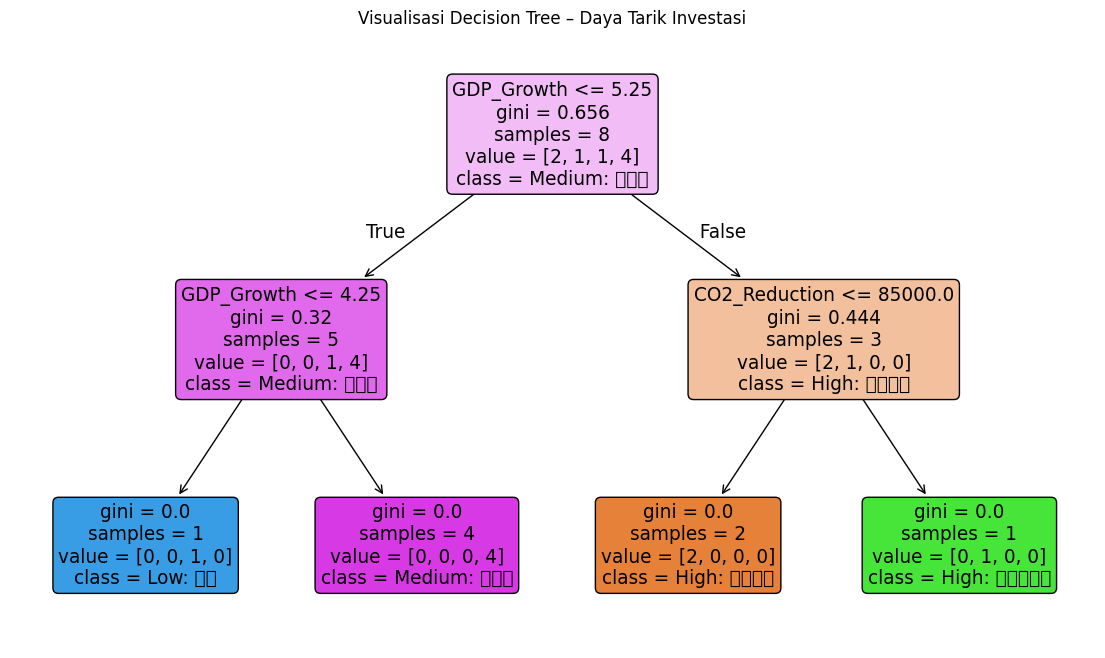

In [139]:
plt.figure(figsize=(14, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Visualisasi Decision Tree – Daya Tarik Investasi")
plt.show()


## Kesimpulan Soal Bonus

Dengan menggunakan Decision Tree, kita dapat membangun model sederhana namun cukup akurat untuk membantu pemerintah atau investor menilai apakah suatu proyek layak atau tidak dari sisi daya tarik investasi.